# Vehicle Insurance Interest Response Classification

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

## Problem Statement 

**An insurance company has provided Health Insurance to its customers now they want a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.**

## Data

|Variable|Definition|
|-----|-----|
|id	|Unique ID for the customer|
|Gender	|Gender of the customer|
|Age	|Age of the customer|
|Driving_License	|0 : Customer does not have DL, 1 : Customer already has DL|
|Region_Code	|Unique code for the region of the customer|
|Previously_Insured	|1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance|
|Vehicle_Age	|Age of the Vehicle|
|Vehicle_Damage	|1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.|
|Annual_Premium	|The amount customer needs to pay as premium in the year|
|PolicySalesChannel	|Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.|
|Vintage	|Number of Days, Customer has been associated with the company|
|Response	|1 : Customer is interested, 0 : Customer is not interested|

## Import libraries

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,classification_report
from sklearn.utils import resample,shuffle

## Read the data

In [153]:
df = pd.read_csv('../data/data.csv')

In [154]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


## Summary of the data


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
id                      381109 non-null int64
Gender                  381109 non-null object
Age                     381109 non-null int64
Driving_License         381109 non-null int64
Region_Code             381109 non-null float64
Previously_Insured      381109 non-null int64
Vehicle_Age             381109 non-null object
Vehicle_Damage          381109 non-null object
Annual_Premium          381109 non-null float64
Policy_Sales_Channel    381109 non-null float64
Vintage                 381109 non-null int64
Response                381109 non-null int64
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [156]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

## Get a count of the target variable and note down your observations

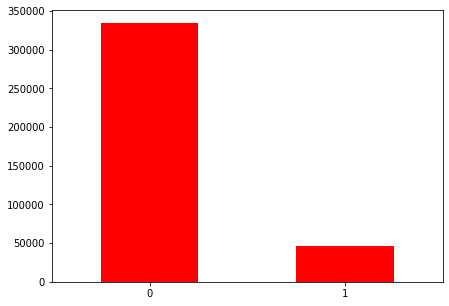

In [157]:
plt.figure(figsize=(7,5))
df.Response.value_counts().plot.bar(rot=0,color='red')
plt.show()

## What is the ratio of male and female in our dataset?

In [158]:
df['Gender'] = df['Gender'].replace(['Male','Female'],[0,1])

In [159]:
df=df.drop('id',1)
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,0,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,0,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,0,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,1,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


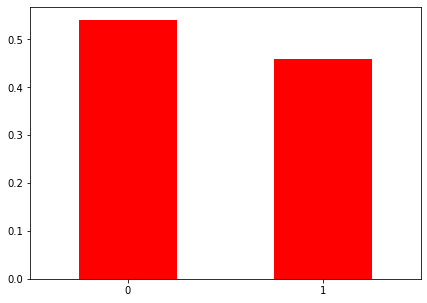

In [160]:
df.Gender.value_counts(normalize=True).plot.bar(figsize=(7,5),color='red',rot=0)
plt.show()

## Check the gender ratio in the interested customers, what are your observations?

<AxesSubplot:>

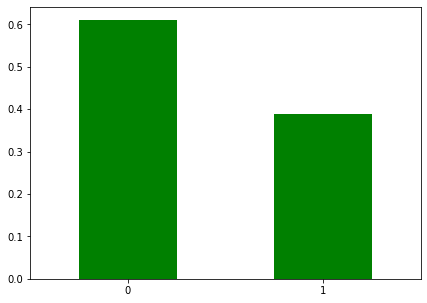

In [161]:
df_intrested = df[df['Response']==1]

df_intrested.Gender.value_counts(normalize=True).plot.bar(figsize=(7,5),color='green',rot=0)

## Find out the distribution of customers age

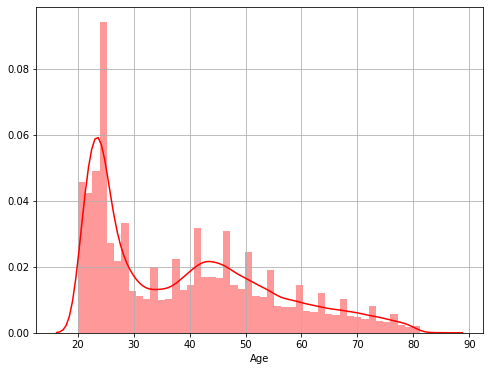

In [162]:
plt.figure(figsize=(8,6))
sns.distplot(df['Age'],color='red')
plt.grid()
plt.ioff()
plt.show()

Age distribution according to Response


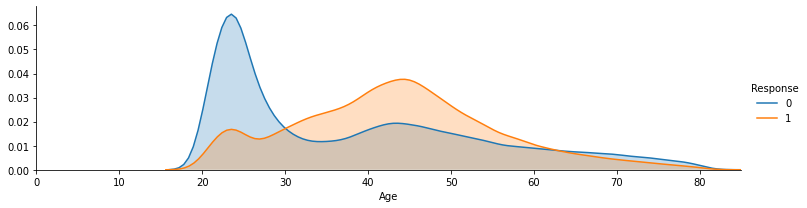

In [163]:
print("Age distribution according to Response")
facetgrid = sns.FacetGrid(df,hue='Response',aspect=3.5)
facetgrid.map(sns.kdeplot,'Age',shade=True)
facetgrid.set(xlim=(0,df['Age'].max()))
facetgrid.add_legend()
plt.show()

## Which regions have people applied from more?

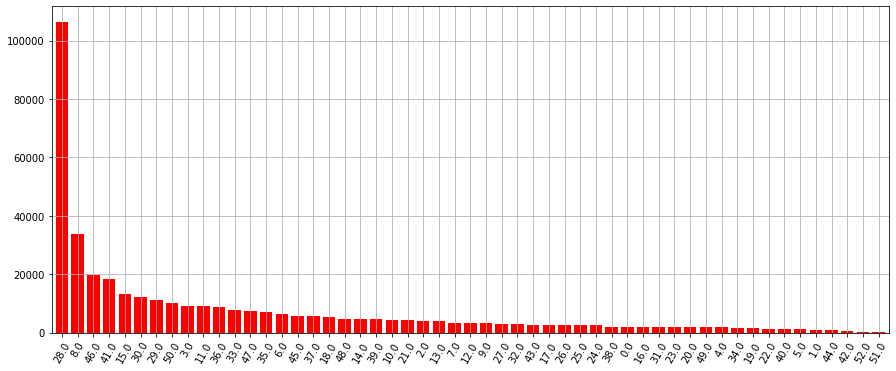

In [164]:
#sns.barplot(x='Region_Code',data=df_intrested)
plt.figure(figsize=(15,6))
df.Region_Code.value_counts().plot.bar(rot=60,color='red',width=0.8) #width=1
plt.grid()
plt.ioff()
plt.show()


## Check the ratio of previously insured, note down your observations

In [165]:
pd.crosstab(df['Response'],df['Previously_Insured'])

Previously_Insured,0,1
Response,,
0,159929,174470
1,46552,158


<AxesSubplot:>

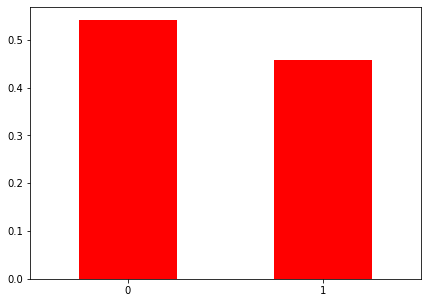

In [166]:
df.Previously_Insured.value_counts(normalize=True).plot.bar(figsize=(7,5),color='red',rot=0)

<AxesSubplot:xlabel='Response'>

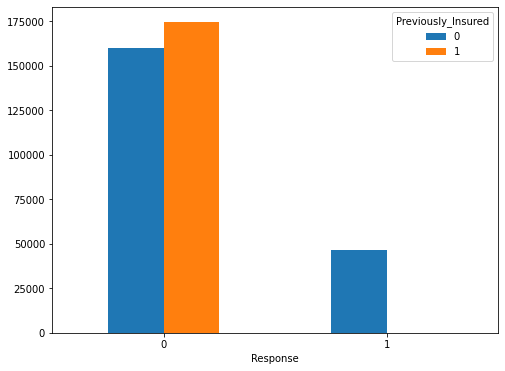

In [167]:
pd.crosstab(df['Response'],df['Previously_Insured']).plot.bar(figsize=(8,6),rot=0)

## How old are most of the vehicles? Does vehicle damage has any effect on the Response variable?

In [168]:
df.Vehicle_Age.nunique()

3

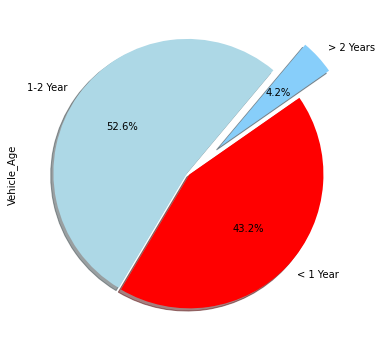

In [169]:
plt.rcParams['figure.figsize']=(6,8)
color = ['lightblue','red',"lightskyblue"]
df['Vehicle_Age'].value_counts().plot.pie(colors=color,explode=(0.02,0,0.3),startangle=50,shadow=True,autopct="%0.1f%%")
plt.show()

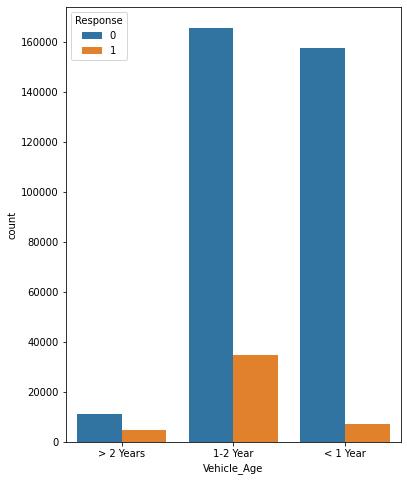

In [170]:
sns.countplot(df['Vehicle_Age'],hue=df['Response'])
plt.show()

In [171]:
pd.crosstab(df['Response'], df['Vehicle_Damage'])

Vehicle_Damage,No,Yes
Response,,
0,187714,146685
1,982,45728


### Plot a correlation matrix, remove the two least correlated features


Correlation matrix-


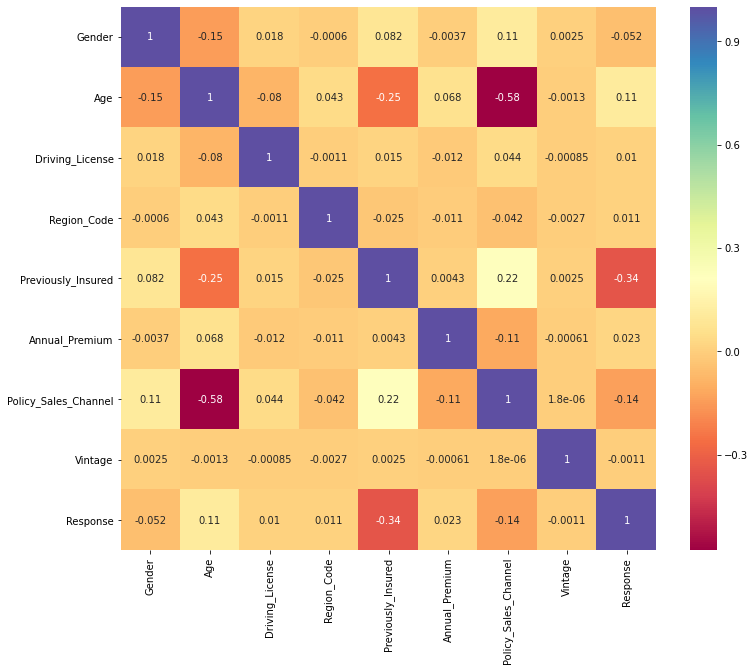

In [172]:
plt.figure(figsize=(12,10))
print("Correlation matrix-")
sns.heatmap(df.corr(),cmap='Spectral',annot = True)
plt.show()

In [173]:
df= df.drop('Vintage',1)

## Split the data into train and test, to avoid data leakage

In [174]:
X = df.drop('Response',1)
y = df['Response']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

## One Hot Encoding the categorical variables

In [175]:
train = pd.get_dummies(data = X_train,columns=['Vehicle_Damage','Vehicle_Age'],drop_first = True)

test = pd.get_dummies(data = X_test,columns=['Vehicle_Damage','Vehicle_Age'],drop_first = True)

## Lets fit a base model of Logistic regression, calculate accuracy, auc_roc score and print classification report.

## What are your observations? Are the results satisfactory?

In [176]:
# initialize the logistic regression model
logisticRegression = LogisticRegression()

# fit the data
logisticRegression.fit(train, y_train)

# find out the predictions
predictions = logisticRegression.predict(test)

score = accuracy_score(y_test,predictions)
ROC_AUC = roc_auc_score(y_test,predictions)

print("Accuracy score is", score )
print('ROC_AUC score is',ROC_AUC)


Accuracy score is 0.8737372412164467
ROC_AUC score is 0.5038787013668526


C:\Users\Abhineet\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [177]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66699
           1       0.34      0.01      0.02      9523

    accuracy                           0.87     76222
   macro avg       0.61      0.50      0.48     76222
weighted avg       0.81      0.87      0.82     76222



## Let us upsample the class with less data so that our model can learn about the minority class

In [178]:
#combining train features and target
dff = pd.concat([train,y_train],axis=1)

# separating the two classes
df_majority = dff[dff['Response']==0]
df_minority = dff[dff['Response']==1]

# upsample the minority class
df_minority_upsampled = resample(df_minority,replace=True,n_samples=y_train.value_counts()[0],random_state = 123)

# Combine the two class data and check for the valu counts of each class
balanced_df = pd.concat([df_minority_upsampled,df_majority])
balanced_df = shuffle(balanced_df)
balanced_df.Response.value_counts()

1    267700
0    267700
Name: Response, dtype: int64

In [179]:
X_trainn = balanced_df.drop('Response',1)
y_trainn = balanced_df['Response']

## Again fit a logistic regression model, find accuracy, auc_roc score and observe the results, have they improved?
## What are your observations?

In [181]:
# fit the model
logisticRegression.fit(X_trainn, y_trainn)

# predict values
predictions = logisticRegression.predict(test)

# printing the accuracy and auc_roc score
print(f"Accuracy score is {100*accuracy_score(y_test,predictions).round(2)}\nROC-AUC score is {100*roc_auc_score(y_test,predictions).round(2)}")

Accuracy score is 64.0
ROC-AUC score is 78.0


In [182]:
# printing the classification report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.60      0.74     66699
           1       0.26      0.97      0.40      9523

    accuracy                           0.64     76222
   macro avg       0.62      0.78      0.57     76222
weighted avg       0.90      0.64      0.70     76222



## Activity : Obviously.Ai demonstration